In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pyadlml.constants import *
import matplotlib.pyplot as plt

#### Not alternating PE

10000.0 0.0001


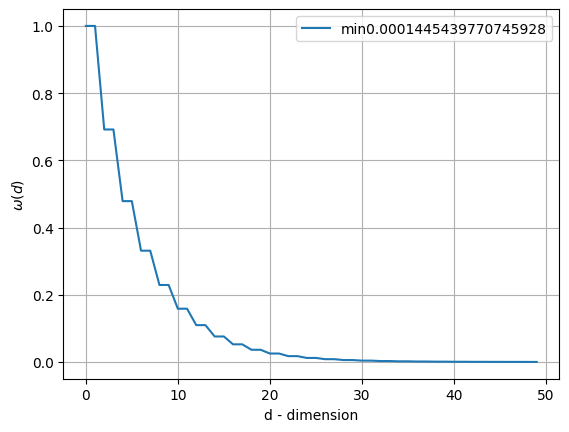

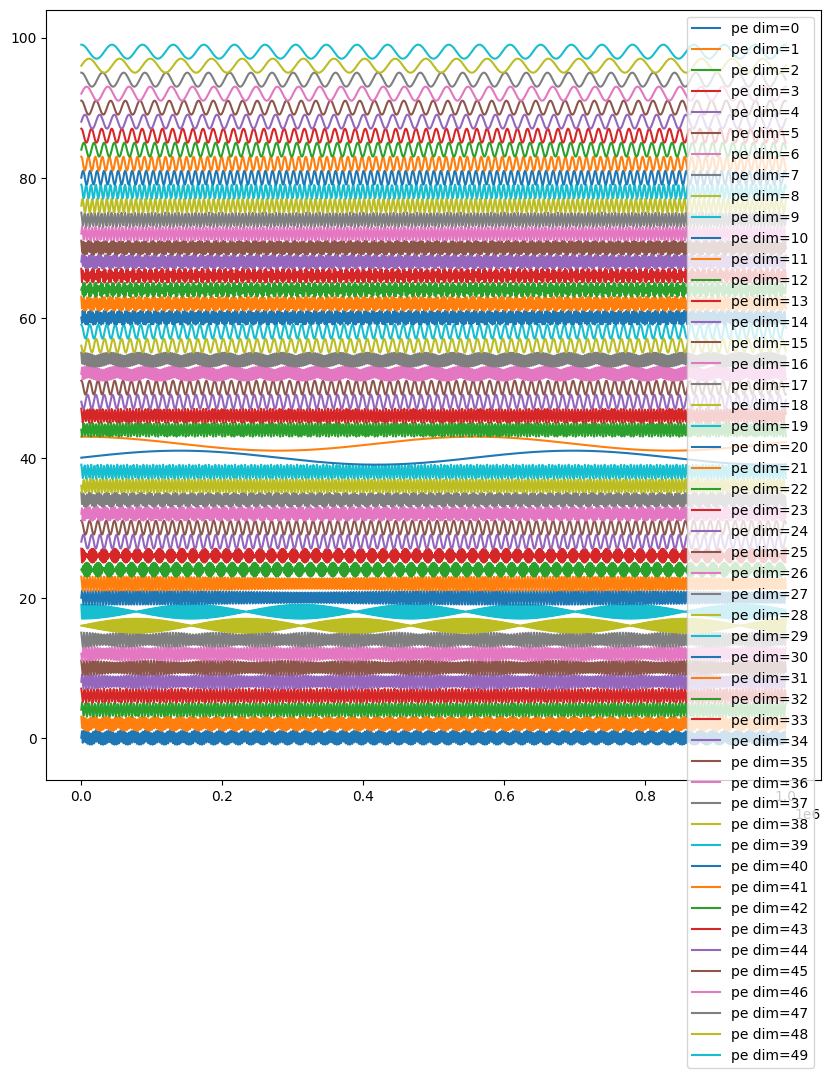

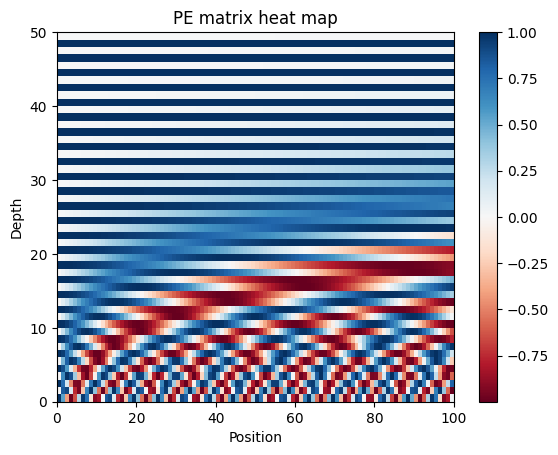

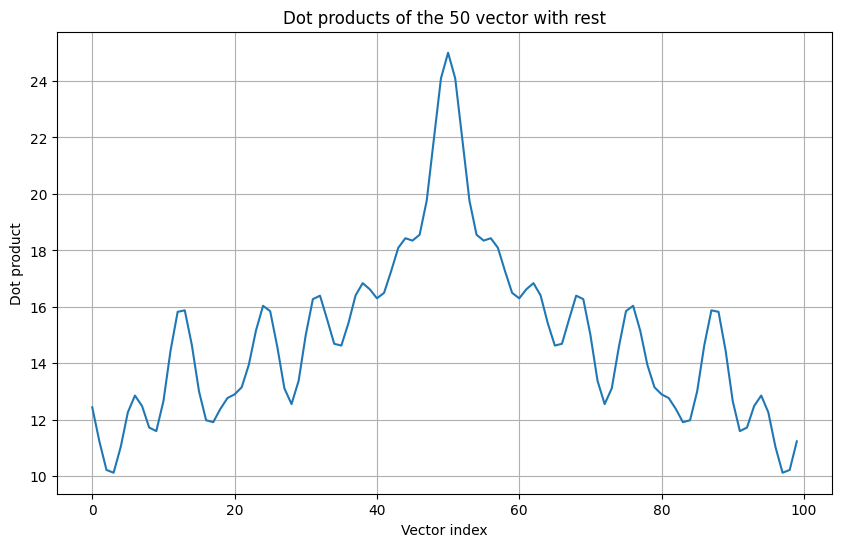

In [2]:
from pyadlml.preprocessing import PositionalEncoding

X = np.arange(0, 100)
pe = PositionalEncoding(d_dim=50, inplace=False)
pe.fit()
print(pe.max_period, pe.min_freq)
ma = pe.transform(X)
pe.plot_angular_freq()
pe.plot_waves(1e6)
pe.plot_pe_mat(X)
pe.plot_dotproduct_similarity(X, 50);

In [ ]:
pd.Timedelta('1D')/pd.Timedelta('8.64s')

In [ ]:
from pyadlml.preprocessing import TimePositionalEncoding
 
    
X = pd.DataFrame(columns=[TIME], 
                  data=pd.date_range(start='6/1/2020', end='6/2/2020 00:30:00', freq='1s')[:-1])
X['f1'] = 2

pe = TimePositionalEncoding(d_dim=14, inplace=False)
pe.fit()
print(pe.res, pe.max_period, pe.min_freq)
#ma = pe.transform(X)
pe.plot_angular_freq()
pe.plot_waves(1e6)
pe.plot_pe_mat(X)
pe.plot_dotproduct_similarity(X, 50)
;

In [8]:
from pyadlml.preprocessing import CyclicTimePositionalEncoding
    
    
X = pd.DataFrame(columns=[TIME], 
                  data=pd.date_range(start='6/1/2020', end='6/2/2020 00:30:00', freq='1s')[:-1])
X['f1'] = 2

pe = CyclicTimePositionalEncoding(d_dim=26, base=2).fit()
print(pe.get_periods())
print(pe.get_max_base())
pe.plotly_wave_length_per_dim().show()

#print(pe.res, pe.max_period, pe.min_freq)
#ma = pe.transform(X)
pe.plot_angular_freq()
#pe.plot_waves(1e6)
pe.plot_pe_mat(X)
pe.plot_dotproduct_similarity(X, 0);
pe._num2td(pe.get_periods().min())


[3.94784176e-03 3.94784176e-03 7.89568352e-03 7.89568352e-03
 1.57913670e-02 1.57913670e-02 3.15827341e-02 3.15827341e-02
 6.31654682e-02 6.31654682e-02 1.26330936e-01 1.26330936e-01
 2.52661873e-01 2.52661873e-01 5.05323745e-01 5.05323745e-01
 1.01064749e+00 1.01064749e+00 2.02129498e+00 2.02129498e+00
 4.04258996e+00 4.04258996e+00 8.08517993e+00 8.08517993e+00
 1.61703599e+01 1.61703599e+01]
13


In [ ]:
import numpy as np
import plotly.graph_objects as go

#  Generate x values from 0 to 2*pi
lmbd = 8640

f = 1/lmbd
get_angular_freqs = np.pi*2*f
x = np.linspace(0, lmbd+100, lmbd*8)

# Compute y values using the sine function
y = np.sin(get_angular_freqs*x)
denom = 2**15
f = 1/(lmbd/min(denom,lmbd))
print(f, denom, lmbd)
get_angular_freqs = np.pi*2*f

y1 = np.sin(get_angular_freqs*x)
e=1
# Create traces
trace0 = go.Scatter(x=x, y=y, mode='lines', name=f'f={f:.2f}, lmbd={1/f:.2f}, e={e}')
trace1 = go.Scatter(x=x, y=y1, mode='lines', name=f'f={f:.2f}, lmbd={1/f:.2f}, e={e}')
trace2 = go.Scatter(x=[np.pi, np.pi], y=[-1, 1], mode='lines', name='pi line', line=dict(color='black', dash='dot'))
trace3 = go.Scatter(x=[1, 1], y=[-1, 1], mode='lines', name='1 line', line=dict(color='black'))
trace4 = go.Scatter(x=[lmbd, lmbd], y=[-1, 1], mode='lines', name='lmbd line', line=dict(color='red'))

layout = go.Layout(title='Sine Function', 
                   xaxis=dict(title='x'), 
                   yaxis=dict(title='sin(x)'))

fig = go.Figure(data=[
    trace0,
    trace1, 
    trace2,
    trace3,
    trace4
], layout=layout)


# Display the plot
fig.show()



In [ ]:
pd.Timedelta('24h')/pd.Timedelta('1s')

In [ ]:
np.log2(8640)

In [ ]:
d_model = 32
seq_length = 864000
max_period = 864000
min_freq = 1/max_period
#min_freq = 1e-3
#min_freq = 100
print(d_model, max_period, min_freq)

In [ ]:
d_model = 32
seq_length = 864000
max_period = 10000
min_freq = 1/max_period
#min_freq = 1e-3
#min_freq = 100
print(d_model, max_period, min_freq)

In [ ]:
def w_discon(d_dim, min_freq):
    i = np.arange(d_dim)//2
    ws = np.power(min_freq, (2*i/d_dim))
    return ws
    
def w_discon1(d_dim, min_freq):
    """period of length 1"""
    i = np.arange(d_dim)//2
    ws = (2*np.pi)*np.power(min_freq, (2*i/d_dim))
    return ws

def w_discon2(d_dim, min_freq):
    """Take only every second angular frequency"""
    d_dim = d_dim*2
    i = np.arange(d_dim)//2
    ws = np.power(min_freq, (2*i/d_dim))
    return ws[1::2]

def w_discon3(d_dim, min_freq):
    """period of length 1"""
    b = 2
    i = np.arange(d_dim)//2
    lmbd = 1/min_freq
    tmp = b**(i)
    f = 1/(lmbd/(np.minimum(tmp, lmbd)))
    ws = 2*np.pi*f
    return ws

get_angular_freqs = w_discon3
    #d = (n_dim-d)//2
    #lmbda = pd.Timedelta('24h')/min_freq**(2*d)
    #lmbda = td2num(lmbda, res)
    #return 1/lmbda*(2*np.pi)
lmbd = lambda freqs: 2*np.pi*freqs
print('w:\n', get_angular_freqs(d_model, min_freq))
print('period:\n', lmbd(get_angular_freqs(d_model, min_freq)))

In [ ]:
def plot_angular_freq(w, d_model, min_freq=1e-3):

    n = w(d_model, min_freq=min_freq)
    #plt.yscale('linear')
    plt.plot(np.arange(len(n)), n, label=f'min{min(n)}')
    plt.xlabel('d - dimension')
    plt.ylabel('$\omega(d)$')
    plt.grid(True)
    plt.legend()

plot_angular_freq(w_discon3, d_model, min_freq)
plot_angular_freq(get_angular_freqs, d_model, min_freq)


In [ ]:
def plot_waves(freqs, max_n):
    import matplotlib.pyplot as plt

    n_dim = len(freqs)

    # Create a figure and an axis
    fig, ax = plt.subplots(figsize=(10,10))

    # Loop over the range of dimensions
    x = np.linspace(0, max_n, 1000)
    for d in range(n_dim):   
        oscil = np.sin if d%2==0 else np.cos     
        ax.plot(x, oscil(freqs[d]*x)+2*d, label=f'pe dim={d}')
    # Set the axis scales to be equal
    #ax.set_aspect('equal', 'box')

    # Show the legend
    ax.legend()


plot_waves(get_angular_freqs(d_dim=d_model, min_freq=min_freq), seq_length)

In [ ]:
get_angular_freqs(d_model, min_freq)[::-1]


In [ ]:
def positional_encoding(position, d_model, min_freq=1e-4):
    freqs = get_angular_freqs(d_model, min_freq)
    pos_enc = position.reshape(-1,1)*freqs.reshape(1,-1)
    pos_enc[:, ::2] = np.cos(pos_enc[:, ::2])
    pos_enc[:, 1::2] = np.sin(pos_enc[:, 1::2])
    return pos_enc

positional_encoding(np.arange(10), d_model=6, min_freq=1e-1)

In [ ]:
### Plotting ####
max_pos = seq_length
mat = positional_encoding(np.arange(max_pos), d_model, min_freq=min_freq)
plt.pcolormesh(mat, cmap='copper')
plt.xlabel('Depth')
plt.xlim((0, d_model))
plt.ylabel('Position')
plt.title("PE matrix heat map")
plt.colorbar()
plt.show()

In [ ]:
def plot_dotproduct_similarity(pe, pos):
    # let's choose the first vector
    first_vector = pe[pos, :]

    # compute the dot products
    dot_products = np.dot(pe,first_vector)

    # visualize with matplotlib
    plt.figure(figsize=(10, 6))
    plt.plot(dot_products)
    plt.title('Dot products of the first vector with the rest')
    plt.xlabel('Vector index')
    plt.ylabel('Dot product')
    plt.grid(True)
    
plot_dotproduct_similarity(mat, 0)

In [ ]:
def pos_enc(t:np.ndarray, n_dim: int, w): 
    PE = np.zeros((len(t), n_dim))
    angular_freqs = w(n_dim) min_freq**(2*(np.arange(d_model)//2)/d_model)
    for i, t in enumerate(t):
        for d in range(n_dim):
            if d%2 == 0:
                PE[i, d] = np.sin(w(d)*t)
            else:
                PE[i, d] = np.cos(w(d)*t)
    return PE

In [ ]:
df = pd.DataFrame(columns=[TIME], 
                  data=pd.date_range(start='6/1/2020', end='6/3/2020 00:30:00', freq='1s')[:-1])
df['f1'] = 2
df

In [ ]:
pe
sns.set(rc={'figure.figsize':(14,4)})
ax = sns.heatmap(pe.T[:,:])
ax.invert_yaxis()
ax.set_ylabel("dimension d")
ax.set_xlabel("time step")
ax.set_title("Sinusoid absolute positional encoding")

In [ ]:
pe.shape

In [ ]:
def get_suitable_base(d, min_period):
    return (np.log(td2num(pd.Timedelta('24h'), res=min_period)/d)/ np.log(d))*2

[get_suitable_base(i, '10ms') for i in range(1, 20)]

In [ ]:
get_suitable_base(3, '100ms' aaaaaq)

In [ ]:
import numpy as np
import seaborn as sns
def get_position_angle_vec(position, dimensions):
    return [position / np.power(10000, 2 * (i // 2) / (dimensions))
            for i in range(dimensions)]

def sinusoid_positional_encoding_ref(length, dim):   
    PE = np.array([get_position_angle_vec(i, dim) for i in range(length)])
    PE[:, 0::2] = np.sin(PE[:, 0::2])
    PE[:, 1::2] = np.cos(PE[:, 1::2])
    return PE

pe2 = sinusoid_positional_encoding_ref(20000, 40)

sns.set(rc={'figure.figsize':(14,4)})
ax = sns.heatmap(pe2.T)
ax.invert_yaxis()
ax.set_ylabel("dimension d")
ax.set_xlabel("time step")
ax.set_title("Sinusoid absolute positional encoding")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
from sklearn.base import TransformerMixin, BaseEstimator
import numpy as np
import pandas as pd

class TimeEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, emb_dim, resolution='1s'):
        self.dim = emb_dim
        self.resolution = resolution

    def fit(self, X=None, y=None):
        self.resolution = pd.Timedelta(self.resolution)

        # Count how many times the timedelta fits into one day
        n = int(pd.Timedelta('24h')/self.resolution)

        # Get positional angles
        positions = np.arange(n)[:, np.newaxis]
        dimensions = np.arange(self.dim)[np.newaxis, :]
        angles = positions / np.power(n, 2 * (dimensions // 2) / self.dim)

        # Do sin and cos encoding
        pe = np.zeros(shape=angles.shape)
        pe[:, 0::2] = np.sin(angles[:, 0::2])
        pe[:, 1::2] = np.cos(angles[:, 1::2])
        self.pe_ = pe
        return self




    def transform(self, X):
        assert isinstance(X, pd.Series), "Input should be a pandas Series of timestamps"
        
        td = X - pd.to_datetime(X.dt.date)
        time_scaled = td / self.resolution

        Xt = self.pe_[time_scaled]
        return Xt

    def plot_positional_encoding(self):
        pe = self.pe_
        import matplotlib.pyplot as plt
        import seaborn as sns

        pe = self.pe_

        sns.set(rc={'figure.figsize':(14,12)})

        fig, axs = plt.subplots(3, 1)

        # Sinusoidal positional encoding
        ax = sns.heatmap(pe[::2, :].T, ax=axs[0], cmap='viridis')
        ax.invert_yaxis()
        ax.set_ylabel("dimension d")
        ax.set_xlabel("time step")
        ax.set_title("Sinusoidal positional encoding")

        # Cosine positional encoding
        ax = sns.heatmap(pe[1::2, :].T, ax=axs[1], cmap='viridis')
        ax.invert_yaxis()
        ax.set_ylabel("dimension d")
        ax.set_xlabel("time step")
        ax.set_title("Cosine positional encoding")

        # Both sinusoidal and cosine positional encoding
        ax = sns.heatmap(pe.T, ax=axs[2], cmap='viridis')
        ax.invert_yaxis()
        ax.set_ylabel("dimension d")
        ax.set_xlabel("time step")
        ax.set_title("Both Sinusoidal and Cosine positional encoding")

        plt.tight_layout()
        return ax

In [ ]:
te.pe_.shape

In [ ]:
te = TimeEncoder(emb_dim=30, resolution='100ms').fit()
te.plot_positional_encoding()

In [ ]:
times = df_acts[START_TIME]
te.fit_transform(times)

In [ ]:
import matplotlib.pyplot as plt
t = 20
n_dim = 20
for t in range(20, 30):
    def get_position_angle_vec(position, dimensions):
        tmp = np.linspace(0, dimensions, 1000)
        return [position / np.power(10000, (2*i)/dimensions) for i in tmp]
    ax = plt.subplot(1,1,1)
    ax.plot(np.linspace(0, n_dim, 1000), np.sin(get_position_angle_vec(t, n_dim)))
    ax.set_ylim(-1.1,1.1)
    plt.show()

In [ ]:
pe.shape

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.arange(0, pe.shape[0]),pe[:, 2])

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.arange(0, pe.shape[0]),pe[:, 4])

In [ ]:
d = 12
denom = lambda i: 2**(i)/d
denom = np.vectorize(denom)
denom(np.arange(0, 12))

In [ ]:
plt.plot(np.arange(0,12), denom(np.arange(0,12)))